In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from scipy import stats
import seaborn as sns
plt.rcParams['font.size'] = 18
#plt.rcParams['font.family'] = "serif"
tdir = 'in'
major = 5.0
minor = 3.0
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

In [83]:
result_path = 'ember_results_cl/task/100/grs_1.0_results.txt'


accs_dict = {}
precs_dict = {}
recalls_dict = {}
f1_dict = {}

with open(result_path) as f:
        lines = f.readlines()
        #print(lines)
        for line in lines:
            #print(line)
            infos = line.split('\t')
            task = infos[0]
            #print(int(task))
            acc, prec, recal, f1 = float(infos[1]), float(infos[2]), float(infos[3]), float(infos[4])

            if task in accs_dict.keys():
                accs_dict[task].append(acc)
                precs_dict[task].append(prec)
                recalls_dict[task].append(recal)
                f1_dict[task].append(f1)
            else:
                accs_dict[task] = [acc]
                precs_dict[task] = [prec]
                recalls_dict[task] = [recal]
                f1_dict[task] = [f1]

#print(accs_dict)

accs_all = []
precs_all = []
recalls_all = []
f1_all = []
for k, v in accs_dict.items():
    accs_all.append(np.mean(v))
    precs_all.append(np.mean(precs_dict[k]))
    recalls_all.append(np.mean(recalls_dict[k]))
    f1_all.append(np.mean(f1_dict[k]))


print(f'{np.mean(accs_all)} {np.mean(precs_all)} \n {np.mean(recalls_all)} {np.mean(f1_all)}')


0.9501548341989313 0.9520589981406253 
 0.9500551717731345 0.9475988806255418


In [86]:
accs_dict['1']

[0.9897836538461539,
 0.9627604166666667,
 0.9858993902439024,
 0.9855392156862746,
 0.9887175324675324,
 0.9694444444444444,
 0.9579295865633076,
 0.98779296875,
 0.9670799365942029,
 0.9822751322751323,
 0.996875,
 0.9506455008865249,
 0.8122957516339869,
 0.9842525819088319,
 0.9724602059925094,
 0.9957932692307693,
 0.9163916925465838,
 0.9567460738539899,
 0.9895833333333334,
 0.995751404494382,
 0.9856436965811965,
 0.9321546052631579,
 0.95875,
 0.9748641304347826,
 0.9925916666666668,
 0.9609642094017095,
 0.9608862704918033,
 0.9938322368421053,
 0.9991319444444444]

In [87]:
def get_results(replay_config, replay_portion, cnt_rate=None, num_replay_sample=200):
    scenario = 'task'
    target_classes = 100
    
    results_dir = './ember_results_cl/' + str(scenario) + '/' + str(target_classes) + '/'
    if replay_config == 'grs':
        result_file = str(replay_config)  + '_' + str(replay_portion) + '_results.txt'
    
    if replay_config == 'ifs' or replay_config == 'frs' and cnt_rate == None:
        result_file = str(replay_config)  + '_' + str(num_replay_sample) + '_results.txt'
    
    if replay_config == 'ifs' and cnt_rate is not None:
        result_file = str(replay_config)  + '_' + str(num_replay_sample) + '_' + str(cnt_rate) + '_results.txt'
        
        
    result_path = results_dir + result_file 
    print(result_path)
    
    accs_dict = {}
    precs_dict = {}
    recalls_dict = {}
    f1_dict = {}

    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:
                #print(line)
                infos = line.split('\t')
                task = infos[0]
                #print(int(task))
                acc, prec, recal, f1 = float(infos[1]), float(infos[2]), float(infos[3]), float(infos[4])

                if task in accs_dict.keys():
                    accs_dict[task].append(acc)
                    precs_dict[task].append(prec)
                    recalls_dict[task].append(recal)
                    f1_dict[task].append(f1)
                else:
                    accs_dict[task] = [acc]
                    precs_dict[task] = [prec]
                    recalls_dict[task] = [recal]
                    f1_dict[task] = [f1]

    #print(accs_dict)
    
    accs_all_task = []
    accs_all = []
    
    precs_all = []
    recalls_all = []
    
    f1_all_task = []
    f1_all = []
    
    
    for k, v in accs_dict.items():
        accs_all_task.append(v)
        accs_all.append(np.mean(v))
        
        precs_all.append(np.mean(precs_dict[k]))
        recalls_all.append(np.mean(recalls_dict[k]))
        
        f1_all_task.append(f1_dict[k])
        f1_all.append(np.mean(f1_dict[k]))


    #print()
    print(f'\nacc    {np.mean(accs_all)* 100:.2f}\u00B1{np.std(accs_all) * 100:.2f}\tf1\t{np.mean(f1_all)* 100:.2f}\u00B1{np.std(f1_all) * 100:.2f}')
    print(f'\nprec   {np.mean(precs_all)* 100:.2f}\u00B1{np.std(precs_all) * 100:.2f}\trecall\t {np.mean(recalls_all)* 100:.2f}\u00B1{np.std(recalls_all) * 100:.2f}')

    print()
    return  np.array(accs_all_task), np.array(accs_all), np.array(precs_all), np.array(recalls_all), np.array(f1_all_task), np.array(f1_all)


In [80]:
grs_100_acc

array([0.96920124, 0.95713599, 0.95551361, 0.95245516, 0.95355913,
       0.95169265, 0.95314227, 0.95123569, 0.95032545, 0.94872475,
       0.95255275, 0.94771674, 0.94643942, 0.94559246, 0.9456168 ,
       0.94551341, 0.94472186, 0.94559458, 0.94470331, 0.9416594 ])

In [161]:
grs_100_accs, grs_100_mean_acc, grs_100_prec, grs_100_recal, grs_100_f1, grs_100_mean_f1 = get_results('grs', 1.0)
grs_50_accs, grs_50_mean_acc, grs_50_prec, grs_50_recal, grs_50_f1, grs_50_mean_f1 = get_results('grs', .50)
grs_20_accs, grs_20_mean_acc, grs_20_prec, grs_50_recal, grs_20_f1, grs_20_mean_f1 = get_results('grs', .20)

frs_500_accs, frs_500_mean_acc, frs_500_prec, frs_500_recal, frs_500_f1, frs_500_mean_f1 = get_results('frs', .10, num_replay_sample=500)
frs_200_accs, frs_200_mean_acc, frs_200_prec, frs_200_recal, frs_200_f1, frs_200_mean_f1 = get_results('frs', .10, num_replay_sample=200)

ifs_500_accs, ifs_500_mean_acc, ifs_500_prec, ifs_500_recal, ifs_500_f1, ifs_500_mean_f1 = get_results('ifs', .10, num_replay_sample=500)
ifs_200_accs, ifs_200_mean_acc, ifs_200_prec, ifs_200_recal, ifs_200_f1, ifs_200_mean_f1 = get_results('ifs', .10, 0.1, num_replay_sample=200)


./ember_results_cl/task/100/grs_1.0_results.txt

acc    95.02±0.60	f1	94.76±0.66

prec   95.21±0.59	recall	 95.01±0.60

./ember_results_cl/task/100/grs_0.5_results.txt

acc    94.65±0.57	f1	94.38±0.64

prec   94.80±0.57	recall	 94.63±0.57

./ember_results_cl/task/100/grs_0.2_results.txt

acc    94.32±0.62	f1	94.02±0.68

prec   94.51±0.62	recall	 94.31±0.62

./ember_results_cl/task/100/frs_500_results.txt

acc    94.92±0.58	f1	94.67±0.64

prec   94.93±0.58	recall	 94.92±0.58

./ember_results_cl/task/100/frs_200_results.txt

acc    94.63±0.96	f1	94.36±1.05

prec   94.65±0.95	recall	 94.63±0.96

./ember_results_cl/task/100/ifs_500_results.txt

acc    94.93±0.84	f1	94.68±0.92

prec   95.08±0.80	recall	 94.92±0.84

./ember_results_cl/task/100/ifs_200_0.1_results.txt

acc    94.80±0.48	f1	94.53±0.52

prec   95.01±0.45	recall	 94.78±0.48



/home/mr6564/anaconda3/envs/PyTorch/lib/python3.7/site-packages/ipykernel_launcher.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [167]:
def results_for_pvalueTest(replay_config, replay_portion, cnt_rate=None, num_replay_sample=200):
    scenario = 'task'
    target_classes = 100
    
    results_dir = './ember_results_cl/' + str(scenario) + '/' + str(target_classes) + '/'
    if replay_config == 'grs':
        result_file = str(replay_config)  + '_' + str(replay_portion) + '_results.txt'
    
    if replay_config == 'ifs' or replay_config == 'frs' and cnt_rate == None:
        result_file = str(replay_config)  + '_' + str(num_replay_sample) + '_results.txt'
    
    if replay_config == 'ifs' and cnt_rate is not None:
        result_file = str(replay_config)  + '_' + str(num_replay_sample) + '_' + str(cnt_rate) + '_results.txt'
        
        
    result_path = results_dir + result_file 
    print()
    print(result_path)
    
    accs_dict = {}
    f1_dict = {}

    with open(result_path) as f:
            lines = f.readlines()
            #print(lines)
            for line in lines:
                #print(line)
                infos = line.split('\t')
                task = infos[0]
                #print(int(task))
                acc, prec, recal, f1 = float(infos[1]), float(infos[2]), float(infos[3]), float(infos[4])

                if task in accs_dict.keys():
                    accs_dict[task].append(acc)
                    f1_dict[task].append(f1)
                else:
                    accs_dict[task] = [acc]
                    f1_dict[task] = [f1]

    def exps_mean(result_dict):
        min_num_exps = np.inf
        for k, v in result_dict.items():
            if len(v) < min_num_exps:
                min_num_exps = len(v)
        print(f'min_num_exps {min_num_exps}')

        exps_dict = {}
        for k, v in result_dict.items():
            v = v[-min_num_exps:]
            for y, x in enumerate(v):
                if y not in exps_dict.keys():
                    exps_dict[y] = [x]
                else:
                    exps_dict[y].append(x)

        mean_accs_exps = []
        for k, v in exps_dict.items():
            mean_accs_exps.append(np.mean(v))
        #print(np.mean(mean_accs_exps))
        #print(mean_accs_exps)

        return np.array(mean_accs_exps)
    
    
    print()
    accs_exps = exps_mean(accs_dict)
    f1s_exps = exps_mean(f1_dict)
    return accs_exps, f1s_exps





In [168]:
grs_100_accs_exps, grs_100_f1s_exps = results_for_pvalueTest('grs', 1.0)
grs_50_accs_exps, grs_50_f1s_exps = results_for_pvalueTest('grs', .50)
grs_20_accs_exps, grs_20_f1s_exps = results_for_pvalueTest('grs', .20)

frs_500_accs_exps, frs_500_f1s_exps = results_for_pvalueTest('frs', .10, num_replay_sample=500)
frs_200_accs_exps, frs_200_f1s_exps = results_for_pvalueTest('frs', .10, num_replay_sample=200)


ifs_500_accs_exps, ifs_500_f1s_exps = results_for_pvalueTest('ifs', .10, num_replay_sample=500)
ifs_200_accs_exps, ifs_200_f1s_exps = results_for_pvalueTest('ifs', .10, 0.1, num_replay_sample=200)
    


./ember_results_cl/task/100/grs_1.0_results.txt

min_num_exps 25
min_num_exps 25

./ember_results_cl/task/100/grs_0.5_results.txt

min_num_exps 27
min_num_exps 27

./ember_results_cl/task/100/grs_0.2_results.txt

min_num_exps 37
min_num_exps 37

./ember_results_cl/task/100/frs_500_results.txt

min_num_exps 41
min_num_exps 41

./ember_results_cl/task/100/frs_200_results.txt

min_num_exps 27
min_num_exps 27

./ember_results_cl/task/100/ifs_500_results.txt

min_num_exps 13
min_num_exps 13

./ember_results_cl/task/100/ifs_200_0.1_results.txt

min_num_exps 8
min_num_exps 8


In [173]:
from scipy.stats import ttest_ind, ttest_1samp
from scipy.stats import f_oneway

a = grs_50_f1s_exps #grs_50_accs_exps
b = ifs_500_f1s_exps

anovaOneWay = f_oneway(a, b)
print(f'anovaOneWay {anovaOneWay}')

anovaOneWay F_onewayResult(statistic=0.668488074260817, pvalue=0.4186764005610393)


In [95]:
prev_joint = np.array([0.96873369, 0.97711378, 0.97082022, 0.96989223, 0.97048895,
       0.97217185, 0.97091197, 0.97067798, 0.96975417, 0.97099006,
       0.97050608, 0.96982739, 0.97128264, 0.97075494, 0.97071863,
       0.9706523 , 0.96987826, 0.96990014, 0.96964549, 0.97020636])

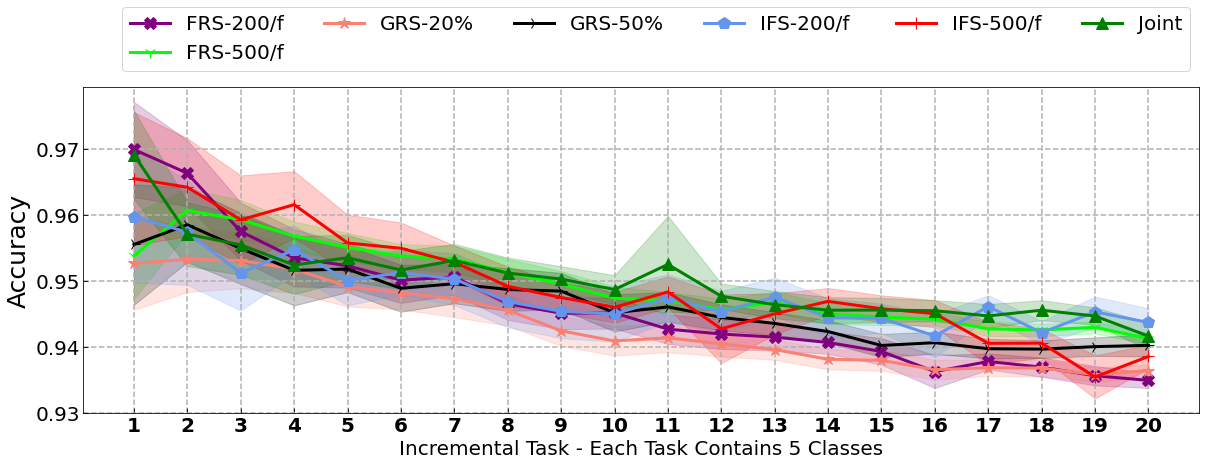

In [166]:
save_file_rocauc = 'EMBER_Task_Diversity.pdf'


x_axis = np.array([i for i in range(20)])

plt.figure(figsize=(20, 6))



# ifs200_sem = [stats.sem(ifs200_accs[i]) for i in range(len(ifs200_accs))]
# plt.fill_between(x_axis + [1], ifs200_mean-ifs200_sem, ifs200_mean+ifs200_sem, color='cornflowerblue', alpha=0.2)
# plt.plot(x_axis + [1],ifs200_mean, 'cornflowerblue',marker= 'p', markersize=12, linewidth=3.0, label='IFS-200/f ')

# ifs500_sem = [stats.sem(ifs500_accs[i]) for i in range(len(ifs500_accs))]
# plt.fill_between(x_axis + [1], ifs500_mean-ifs500_sem, ifs500_mean+ifs500_sem, color='yellow', alpha=0.2)
# plt.plot(x_axis + [1],ifs500_mean, 'yellow',marker= '+', markersize=12, linewidth=3.0, label='IFS-500/f')


# gr_sem = [stats.sem(gr_accs[i]) for i in range(len(gr_accs))]
# plt.fill_between(x_axis + [1], gr_mean-gr_sem, gr_mean+gr_sem, color='red', alpha=0.2)
# plt.plot(x_axis + [1],gr_mean, 'red',marker= 'H', markersize=12, linewidth=3.0, label='GR')


# icarl_sem = [stats.sem(icarl_accs[i]) for i in range(len(icarl_accs))]
# plt.fill_between(x_axis + [1], icarl_mean-icarl_sem, icarl_mean+icarl_sem, color='blue', alpha=0.2)
# plt.plot(x_axis + [1], icarl_mean, 'blue',marker= 'o', markersize=12, linewidth=3.0, label='iCaRL')


# bir_sem = [stats.sem(bir_accs[i]) for i in range(len(bir_accs))]
# plt.fill_between(x_axis + [1], bir_mean-bir_sem, bir_mean+bir_sem, color='orange', alpha=0.2)
# plt.plot(x_axis + [1],bir_mean, 'orange',marker= '1', markersize=12, linewidth=3.0, label='BI-R')


# twohundred_sem = [stats.sem(twohundred_acc[i]) for i in range(len(twohundred_acc))]
# plt.fill_between(x_axis + [1], twohundred_acc_mean-twohundred_sem,\
#                  twohundred_acc_mean+twohundred_sem, color='purple', alpha=0.2)
# plt.plot(x_axis + [1],twohundred_acc_mean, 'purple',marker= 'X',\
#          markersize=12, linewidth=3.0, label='FRS-200/f')


# fivehundred_sem = [stats.sem(fivehundred_acc[i]) for i in range(len(fivehundred_acc))]
# plt.fill_between(x_axis + [1], fivehundred_acc_mean-fivehundred_sem,\
#                  fivehundred_acc_mean+fivehundred_sem, color='lime', alpha=0.2)
# plt.plot(x_axis + [1],fivehundred_acc_mean, 'lime',marker= 'o', markersize=12, linewidth=3.0, label='FRS-500/f')



frs_200_sem = [stats.sem(frs_200_accs[i]) for i in range(len(frs_200_accs))]
plt.fill_between(x_axis + [1], frs_200_mean_acc-frs_200_sem,\
                 frs_200_mean_acc+frs_200_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],frs_200_mean_acc, 'purple',marker= 'X',\
         markersize=12, linewidth=3.0, label='FRS-200/f')


frs_500_sem = [stats.sem(frs_500_accs[i]) for i in range(len(frs_500_accs))]
plt.fill_between(x_axis + [1], frs_500_mean_acc-frs_500_sem, frs_500_mean_acc+frs_500_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],frs_500_mean_acc, 'lime',marker= '1', markersize=12, linewidth=3.0, label='FRS-500/f')



grs_20_sem = [stats.sem(grs_20_accs[i]) for i in range(len(grs_20_accs))]
plt.fill_between(x_axis + [1], grs_20_mean_acc-grs_20_sem, grs_20_mean_acc+grs_20_sem, color='salmon', alpha=0.2)
plt.plot(x_axis + [1],grs_20_mean_acc, 'salmon',marker= '*', markersize=12, linewidth=3.0, label='GRS-20%')


grs_50_sem = [stats.sem(grs_50_accs[i]) for i in range(len(grs_50_accs))]
plt.fill_between(x_axis + [1], grs_50_mean_acc-grs_50_sem, grs_50_mean_acc+grs_50_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],grs_50_mean_acc, 'black',marker= '4', markersize=12, linewidth=3.0, label='GRS-50%')




ifs200_sem = [stats.sem(ifs_200_accs[i]) for i in range(len(ifs_200_accs))]
plt.fill_between(x_axis + [1], ifs_200_mean_acc-ifs200_sem, ifs_200_mean_acc+ifs200_sem, color='cornflowerblue', alpha=0.2)
plt.plot(x_axis + [1],ifs_200_mean_acc, 'cornflowerblue',marker= 'p', markersize=12, linewidth=3.0, label='IFS-200/f ')

ifs500_sem = [stats.sem(ifs_500_accs[i]) for i in range(len(ifs_500_accs))]
plt.fill_between(x_axis + [1], ifs_500_mean_acc-ifs500_sem, ifs_500_mean_acc+ifs500_sem, color='red', alpha=0.2)
plt.plot(x_axis + [1],ifs_500_mean_acc, 'red',marker= '+', markersize=12, linewidth=3.0, label='IFS-500/f')




grs_100_sem = [stats.sem(grs_100_accs[i]) for i in range(len(grs_100_accs))]
plt.fill_between(x_axis + [1], grs_100_mean_acc-grs_100_sem, grs_100_mean_acc+grs_100_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],grs_100_mean_acc, 'green',marker= '^', markersize=12, linewidth=3.0, label='Joint')


plt.legend(ncol=6, loc=(0.035, 1.05), fontsize=20)


plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Incremental Task - Each Task Contains 5 Classes', fontsize=20)
plt.xticks([1, 2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],\
           ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],\
           fontsize=20, fontweight ='bold') 
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=1.5)

# plt.savefig('./figs_proposal/' + save_file_rocauc,
#                 bbox_inches='tight', dpi=300);

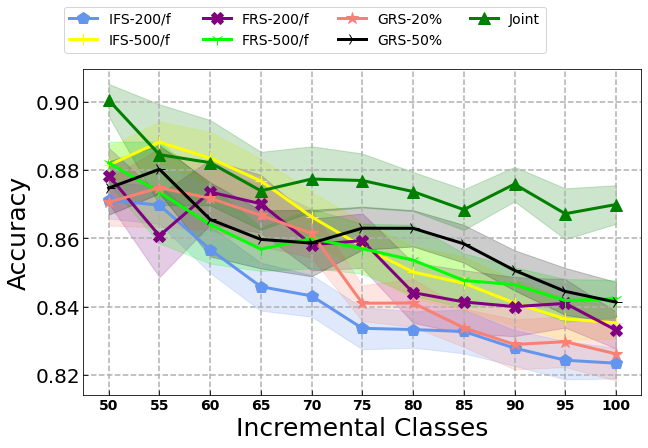

In [115]:
save_file_rocauc = 'EMBER_Task_Diversity_Limit.pdf'


x_axis = np.array([i for i in range(11)])

plt.figure(figsize=(10, 6))



# none_sem = [stats.sem(none_accs[i]) for i in range(len(none_accs))]
# plt.fill_between(x_axis + [1], none_mean-none_sem, none_mean+none_sem, color='olive', alpha=0.2)
# plt.plot(x_axis + [1],none_mean, 'olive', marker= 'D', markersize=12, linewidth=3.0, label='None')


ifs200_sem = [stats.sem(ifs200_accs[i]) for i in range(len(ifs200_accs))]
plt.fill_between(x_axis + [1], ifs200_mean-ifs200_sem, ifs200_mean+ifs200_sem, color='cornflowerblue', alpha=0.2)
plt.plot(x_axis + [1],ifs200_mean, 'cornflowerblue',marker= 'p', markersize=12, linewidth=3.0, label='IFS-200/f ')

ifs500_sem = [stats.sem(ifs500_accs[i]) for i in range(len(ifs500_accs))]
plt.fill_between(x_axis + [1], ifs500_mean-ifs500_sem, ifs500_mean+ifs500_sem, color='yellow', alpha=0.2)
plt.plot(x_axis + [1],ifs500_mean, 'yellow',marker= '+', markersize=12, linewidth=3.0, label='IFS-500/f')


# gr_sem = [stats.sem(gr_accs[i]) for i in range(len(gr_accs))]
# plt.fill_between(x_axis + [1], gr_mean-gr_sem, gr_mean+gr_sem, color='red', alpha=0.2)
# plt.plot(x_axis + [1],gr_mean, 'red',marker= 'H', markersize=12, linewidth=3.0, label='GR')


# icarl_sem = [stats.sem(icarl_accs[i]) for i in range(len(icarl_accs))]
# plt.fill_between(x_axis + [1], icarl_mean-icarl_sem, icarl_mean+icarl_sem, color='blue', alpha=0.2)
# plt.plot(x_axis + [1], icarl_mean, 'blue',marker= 'o', markersize=12, linewidth=3.0, label='iCaRL')


# bir_sem = [stats.sem(bir_accs[i]) for i in range(len(bir_accs))]
# plt.fill_between(x_axis + [1], bir_mean-bir_sem, bir_mean+bir_sem, color='orange', alpha=0.2)
# plt.plot(x_axis + [1],bir_mean, 'orange',marker= '1', markersize=12, linewidth=3.0, label='BI-R')


# twohundred_sem = [stats.sem(twohundred_acc[i]) for i in range(len(twohundred_acc))]
# plt.fill_between(x_axis + [1], twohundred_acc_mean-twohundred_sem,\
#                  twohundred_acc_mean+twohundred_sem, color='purple', alpha=0.2)
# plt.plot(x_axis + [1],twohundred_acc_mean, 'purple',marker= 'X',\
#          markersize=12, linewidth=3.0, label='FRS-200/f')


# fivehundred_sem = [stats.sem(fivehundred_acc[i]) for i in range(len(fivehundred_acc))]
# plt.fill_between(x_axis + [1], fivehundred_acc_mean-fivehundred_sem,\
#                  fivehundred_acc_mean+fivehundred_sem, color='lime', alpha=0.2)
# plt.plot(x_axis + [1],fivehundred_acc_mean, 'lime',marker= 'o', markersize=12, linewidth=3.0, label='FRS-500/f')



frs200_sem = [stats.sem(frs200_accs[i]) for i in range(len(frs200_accs))]
plt.fill_between(x_axis + [1], frs200_mean-frs200_sem,\
                 frs200_mean+frs200_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],frs200_mean, 'purple',marker= 'X',\
         markersize=12, linewidth=3.0, label='FRS-200/f')


frs500_sem = [stats.sem(frs500_accs[i]) for i in range(len(frs500_accs))]
plt.fill_between(x_axis + [1], frs500_mean-frs500_sem, frs500_mean+frs500_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],frs500_mean, 'lime',marker= '1', markersize=12, linewidth=3.0, label='FRS-500/f')



grs20_sem = [stats.sem(grs20_accs[i]) for i in range(len(grs20_accs))]
plt.fill_between(x_axis + [1], grs20_mean-grs20_sem, grs20_mean+grs20_sem, color='salmon', alpha=0.2)
plt.plot(x_axis + [1],grs20_mean, 'salmon',marker= '*', markersize=12, linewidth=3.0, label='GRS-20%')


grs50_sem = [stats.sem(grs50_accs[i]) for i in range(len(grs50_accs))]
plt.fill_between(x_axis + [1], grs50_mean-grs50_sem, grs50_mean+grs50_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],grs50_mean, 'black',marker= '4', markersize=12, linewidth=3.0, label='GRS-50%')



joint_sem = [stats.sem(joint_accs[i]) for i in range(len(joint_accs))]
plt.fill_between(x_axis + [1], joint_mean-joint_sem, joint_mean+joint_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],joint_mean, 'green',marker= '^', markersize=12, linewidth=3.0, label='Joint')



plt.legend(ncol=4, loc=(-0.035, 1.05), fontsize=14)


plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Incremental Classes', fontsize=25)
plt.xticks([1,2,3,4,5,6, 7, 8, 9, 10, 11],\
           ['50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100'],\
           fontsize=14, fontweight ='bold')
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', linewidth=1.5)

plt.savefig('./figs_proposal/' + save_file_rocauc,
                bbox_inches='tight', dpi=300);